<a href="https://colab.research.google.com/github/ghodsieh86/ghodsieh6220project/blob/main/seedstest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# install slim version (default): if you get an error message, run it again
!pip install pycaret==2.3.6

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pycaret-2.3.6-py3-none-any.whl (301 kB)
  Using cached mlxtend-0.22.0-py2.py3-none-any.whl (1.4 MB)
  Using cached spacy-2.3.9-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.9 MB)
  Using cached mlflow-2.2.2-py3-none-any.whl (17.6 MB)
  Using cached scikit-learn-0.23.2.tar.gz (7.2 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached pyLDAvis-3.4.0-py3-none-any.whl (2.6 MB)
  Using cached kmodes-0.12.2-py2.py3-none-any.whl (20 kB)
  Using cached PyYAML-5.4.1-cp39-cp39-manylinux1_x86_64.whl (630 kB)
  Using cached umap-learn-0.5.3.tar.gz (88 kB)
  Preparing metadata (setup.py) ... done
  Using cached gensim-3.8.3.tar.gz (23.4 MB)
  Preparing metadata (setup.py) ... done
  Using cached scipy-1.5.4-cp39-cp39-manylinux1_x86_64.whl (25.8 MB)
  Using cached imbalanced_

In [11]:
#Run the below code in your notebook to check the installed version
from pycaret.utils import version
version()

'2.3.6'

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import pandas as pd
plt.rcParams['figure.figsize'] = (7,5)

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [13]:
print("Pandas version: ", pd.__version__)
print("Seaborn version: ", sns.__version__)

Pandas version:  1.4.4
Seaborn version:  0.12.2


In [14]:
#read cvs file into dataframe
df = pd.read_csv('https://raw.githubusercontent.com/myconcordia/INSE6220/main/seeds.csv')
df.head(25)

,AR,PR,CP,LK,WD,AS,LG,class
0,15.26,14.84,0.8710,5.763,3.312,2.2210,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.0180,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.6990,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.2590,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.3550,5.175,1
5,14.38,14.21,0.8951,5.386,3.312,2.4620,4.956,1
6,14.69,14.49,0.8799,5.563,3.259,3.5860,5.219,1
7,14.11,14.10,0.8911,5.420,3.302,2.7000,5.000,1
8,16.63,15.46,0.8747,6.053,3.465,2.0400,5.877,1
9,16.44,15.25,0.8880,5.884,3.505,1.9690,5.533,1


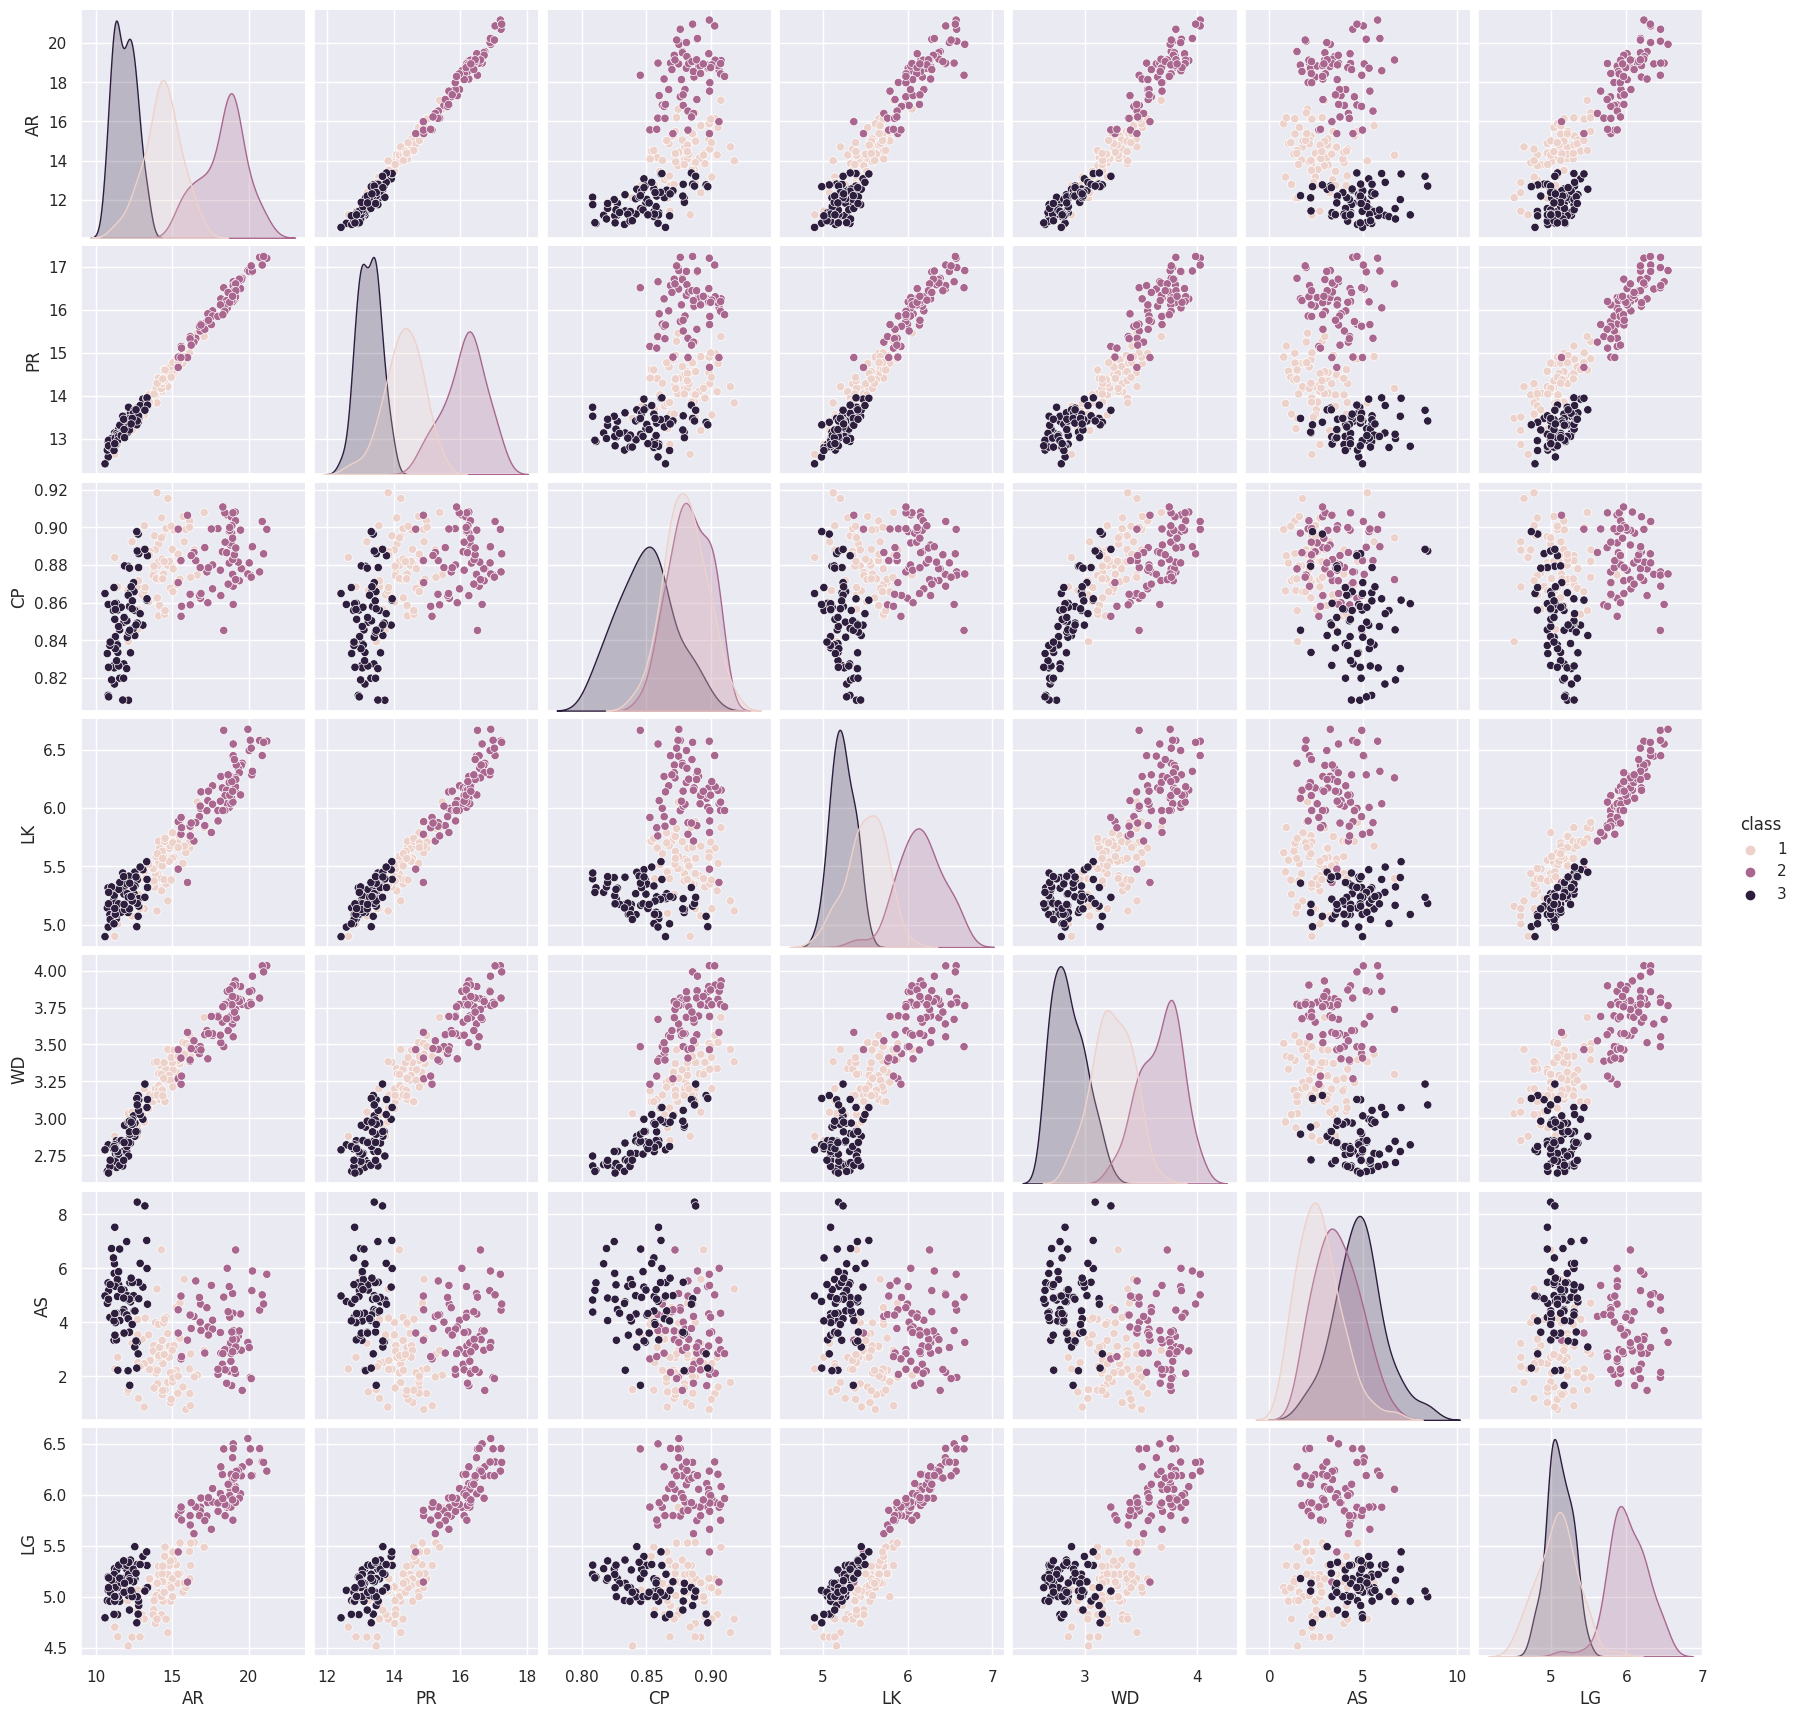

In [15]:
sns.pairplot(df, hue='class')
plt.show()

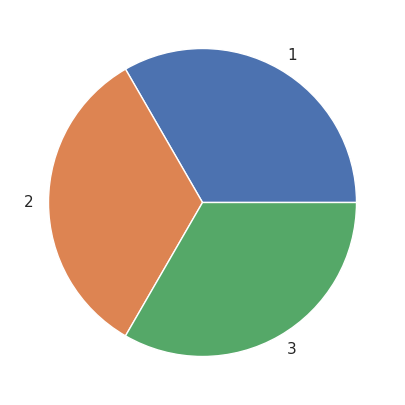

In [16]:
y =df['class']
y.value_counts().plot(kind='pie')
plt.ylabel('')
plt.show()

In [17]:
X = df.drop(columns=['class'])
X.head(10)

,AR,PR,CP,LK,WD,AS,LG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175
5,14.38,14.21,0.8951,5.386,3.312,2.462,4.956
6,14.69,14.49,0.8799,5.563,3.259,3.586,5.219
7,14.11,14.10,0.8911,5.420,3.302,2.700,5.000
8,16.63,15.46,0.8747,6.053,3.465,2.040,5.877
9,16.44,15.25,0.8880,5.884,3.505,1.969,5.533


In [18]:
X.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
AR,210.0,14.847524,2.909699,10.5900,12.27000,14.35500,17.305000,21.1800
PR,210.0,14.559286,1.305959,12.4100,13.45000,14.32000,15.715000,17.2500
CP,210.0,0.870999,0.023629,0.8081,0.85690,0.87345,0.887775,0.9183
LK,210.0,5.628533,0.443063,4.8990,5.26225,5.52350,5.979750,6.6750
WD,210.0,3.258605,0.377714,2.6300,2.94400,3.23700,3.561750,4.0330
AS,210.0,3.700201,1.503557,0.7651,2.56150,3.59900,4.768750,8.4560
LG,210.0,5.408071,0.491480,4.5190,5.04500,5.22300,5.877000,6.5500


In [19]:
Xs = StandardScaler().fit_transform(X)
Xcols = X.columns
X = pd.DataFrame(Xs)
X.columns = Xcols
X.head(10)

,AR,PR,CP,LK,WD,AS,LG
0,0.142098,0.215462,0.000061,0.304218,0.141702,-0.986152,-0.383577
1,0.011188,0.008224,0.428515,-0.168625,0.197432,-1.788166,-0.922013
2,-0.192067,-0.360201,1.442383,-0.763637,0.208048,-0.667479,-1.189192
3,-0.347091,-0.475333,1.039381,-0.688978,0.319508,-0.960818,-1.229983
4,0.445257,0.330595,1.374509,0.066666,0.805159,-1.563495,-0.475356
5,-0.161062,-0.268094,1.022413,-0.548709,0.141702,-0.825482,-0.922013
6,-0.054267,-0.053180,0.377610,-0.148263,0.001049,-0.076135,-0.385617
7,-0.254076,-0.352525,0.852728,-0.471787,0.115164,-0.666813,-0.832274
8,0.614062,0.691344,0.157019,0.960316,0.547738,-1.106821,0.956394
9,0.548607,0.530158,0.721222,0.577969,0.653891,-1.154155,0.254796


In [20]:
observations = list(df.index)
variables = list(df.columns)

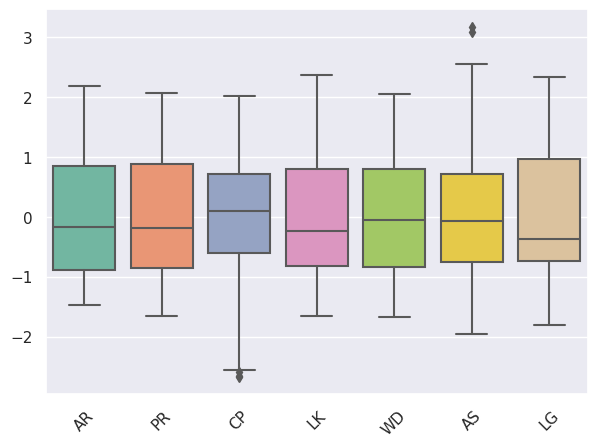

In [21]:
ax = plt.figure()
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

/usr/local/lib/python3.9/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:.25'` for same effect.
  warnings.warn(msg, FutureWarning)


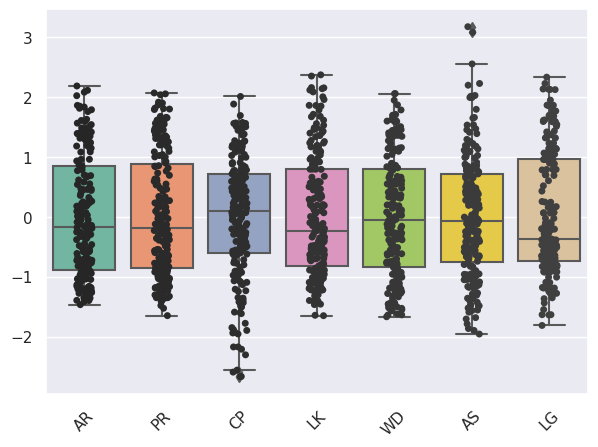

In [22]:
# Use swarmplot() or stripplot to show the datapoints on top of the boxes:
#plt. figure()
ax = plt.figure()    
ax = sns.boxplot(data=X, orient="v", palette="Set2")
ax = sns.stripplot(data=X, color=".25") 
ax.set_xticklabels(ax.get_xticklabels(),rotation=45);

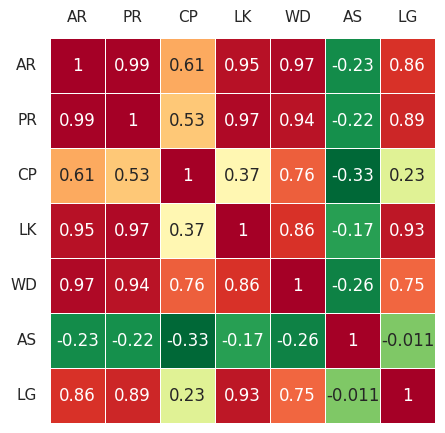

In [23]:
ax = sns.heatmap(X.corr(), cmap='RdYlGn_r', linewidths=0.5, annot=True, cbar=False, square=True)
plt.yticks(rotation=0)
ax.tick_params(labelbottom=False,labeltop=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0);

#X.corr().style.background_gradient(cmap='coolwarm').set_precision(2)
#sns.clustermap(X.corr(), annot=True, fmt='.2f')

Text(0, 0.5, '$Z_2$')

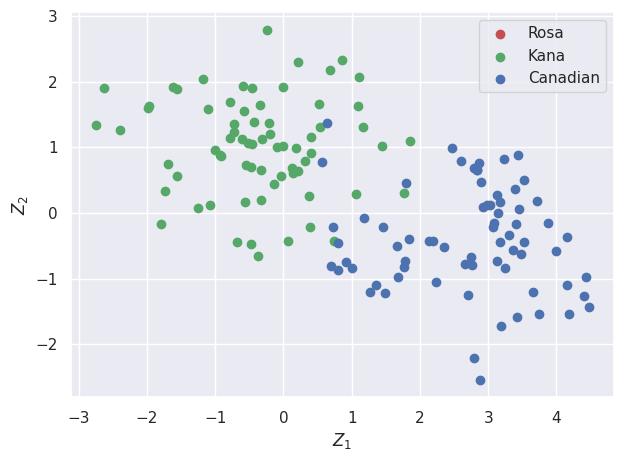

In [24]:
pca = PCA()
Z = pca.fit_transform(X)

# 1(Rosa)->0,  2(Kama)->1, 3(Canadian)->2
idx_Rosa = np.where(y == 0)
idx_Kana = np.where(y == 1)
idx_Canadian = np.where(y == 2)

plt. figure()
plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')

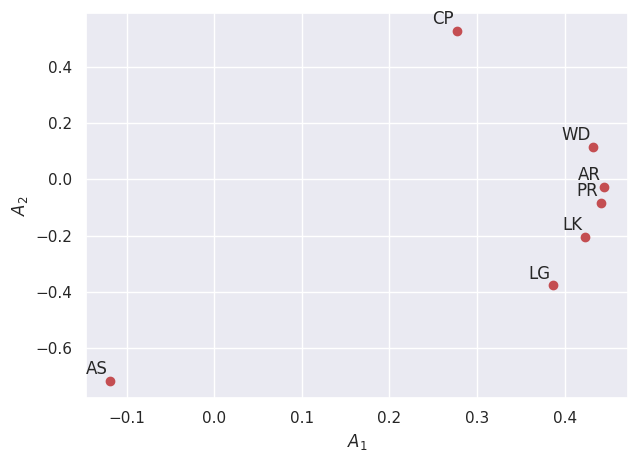

In [25]:
A = pca.components_.T 

plt.scatter(A[:,0],A[:,1],c='r')
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables, A[:, 0], A[:, 1]):
  plt.annotate(label, xy=(x, y), xytext=(-2, 2), textcoords='offset points', ha='right', va='bottom')

/usr/local/lib/python3.9/dist-packages/matplotlib/collections.py:963: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


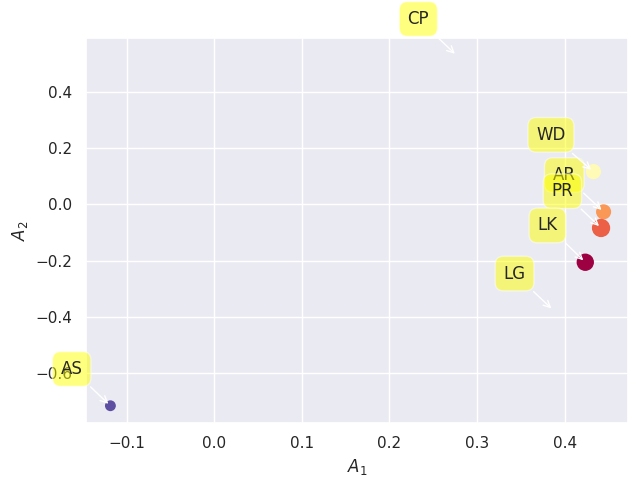

In [26]:
plt.scatter(A[:, 0],A[:, 1], marker='o', c=A[:, 2], s=A[:, 3]*500, cmap=plt.get_cmap('Spectral'))
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for label, x, y in zip(variables,A[:, 0],A[:, 1]):
  plt.annotate(label,xy=(x, y), xytext=(-20, 20),
      textcoords='offset points', ha='right', va='bottom',
      bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
      arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

Text(0, 0.5, 'Explained variance')

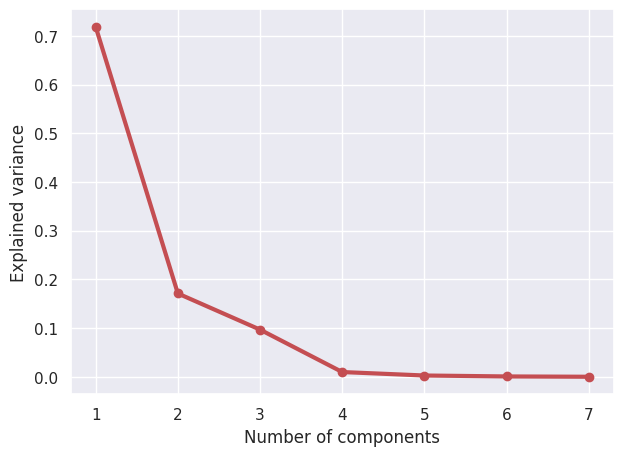

In [27]:
#Eigenvalues
Lambda = pca.explained_variance_ 

#Scree plot
x = np.arange(len(Lambda)) + 1
plt.plot(x,Lambda/sum(Lambda), 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 

Text(0, 0.5, 'Cumulative explained variance')

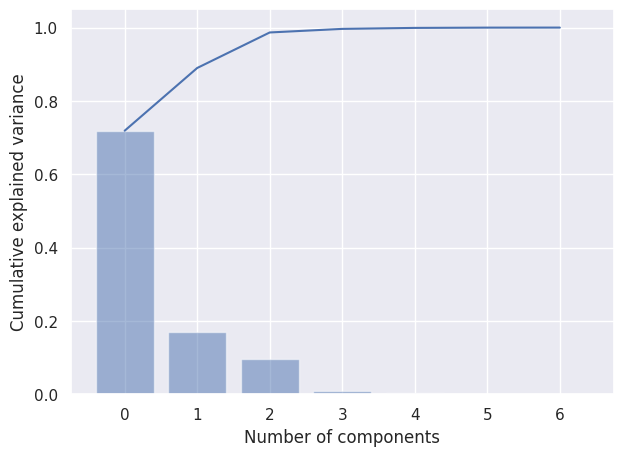

In [28]:
ell = pca.explained_variance_ratio_
ind = np.arange(len(ell))
plt.bar(ind, ell, align='center', alpha=0.5)
plt.plot(np.cumsum(ell))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')

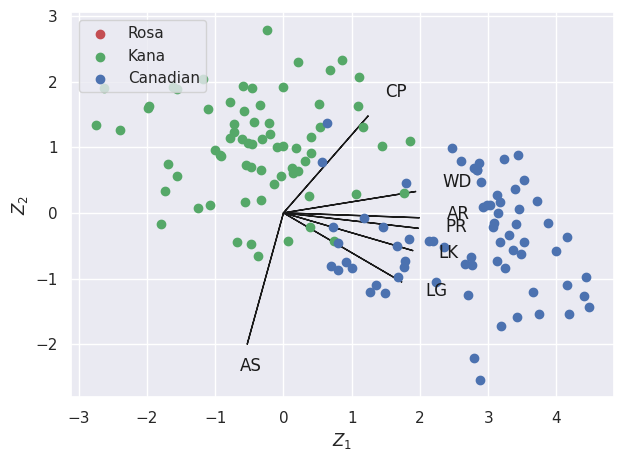

In [29]:
# 0,1 denote PC1 and PC2; change values for other PCs
A1 = A[:,0] 
A2 = A[:,1]
Z1 = Z[:,0] 
Z2 = Z[:,1]

plt.figure()
plt.xlabel('$Z_1$')
plt.ylabel('$Z_2$')
for i in range(len(A1)):
# arrows project features as vectors onto PC axes
  plt.arrow(0, 0, A1[i]*max(Z1), A2[i]*max(Z2), color='k', width=0.0005, head_width=0.0025)
  plt.text(A1[i]*max(Z1)*1.2, A2[i]*max(Z2)*1.2,variables[i], color='k')

plt.scatter(Z[idx_Rosa,0], Z[idx_Rosa,1], c='r', label='Rosa')
plt.scatter(Z[idx_Kana,0], Z[idx_Kana,1], c='g', label='Kana')
plt.scatter(Z[idx_Canadian,0], Z[idx_Canadian,1], c='b', label='Canadian')
plt.legend(loc='upper left')

In [30]:
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
from pca import pca
# Initialize and keep all PCs
model = pca()
# Fit transform
out = model.fit_transform(X)

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [7] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [3] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [7] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[3]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


In [32]:
out['PC']

,PC1,PC2,PC3
0,0.317047,0.783669,-0.631010
1,-0.003386,1.913214,-0.669754
2,-0.459443,1.907225,0.932489
3,-0.591936,1.931069,0.499311
4,1.102910,2.068090,0.056705
...,...,...,...
205,-1.991107,0.865956,0.513303
206,-2.726865,-0.208190,-0.059059
207,-1.403633,-1.298593,2.905811
208,-2.339328,0.099699,-0.382515


[colourmap]> Warning: Colormap [Set1] can not create [210] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [210] unique colors! Available unique colors: [9].


(<Figure size 2000x1500 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.64%] of the variance'}, xlabel='PC1 (71.8% expl.var)', ylabel='PC2 (17.1% expl.var)'>)

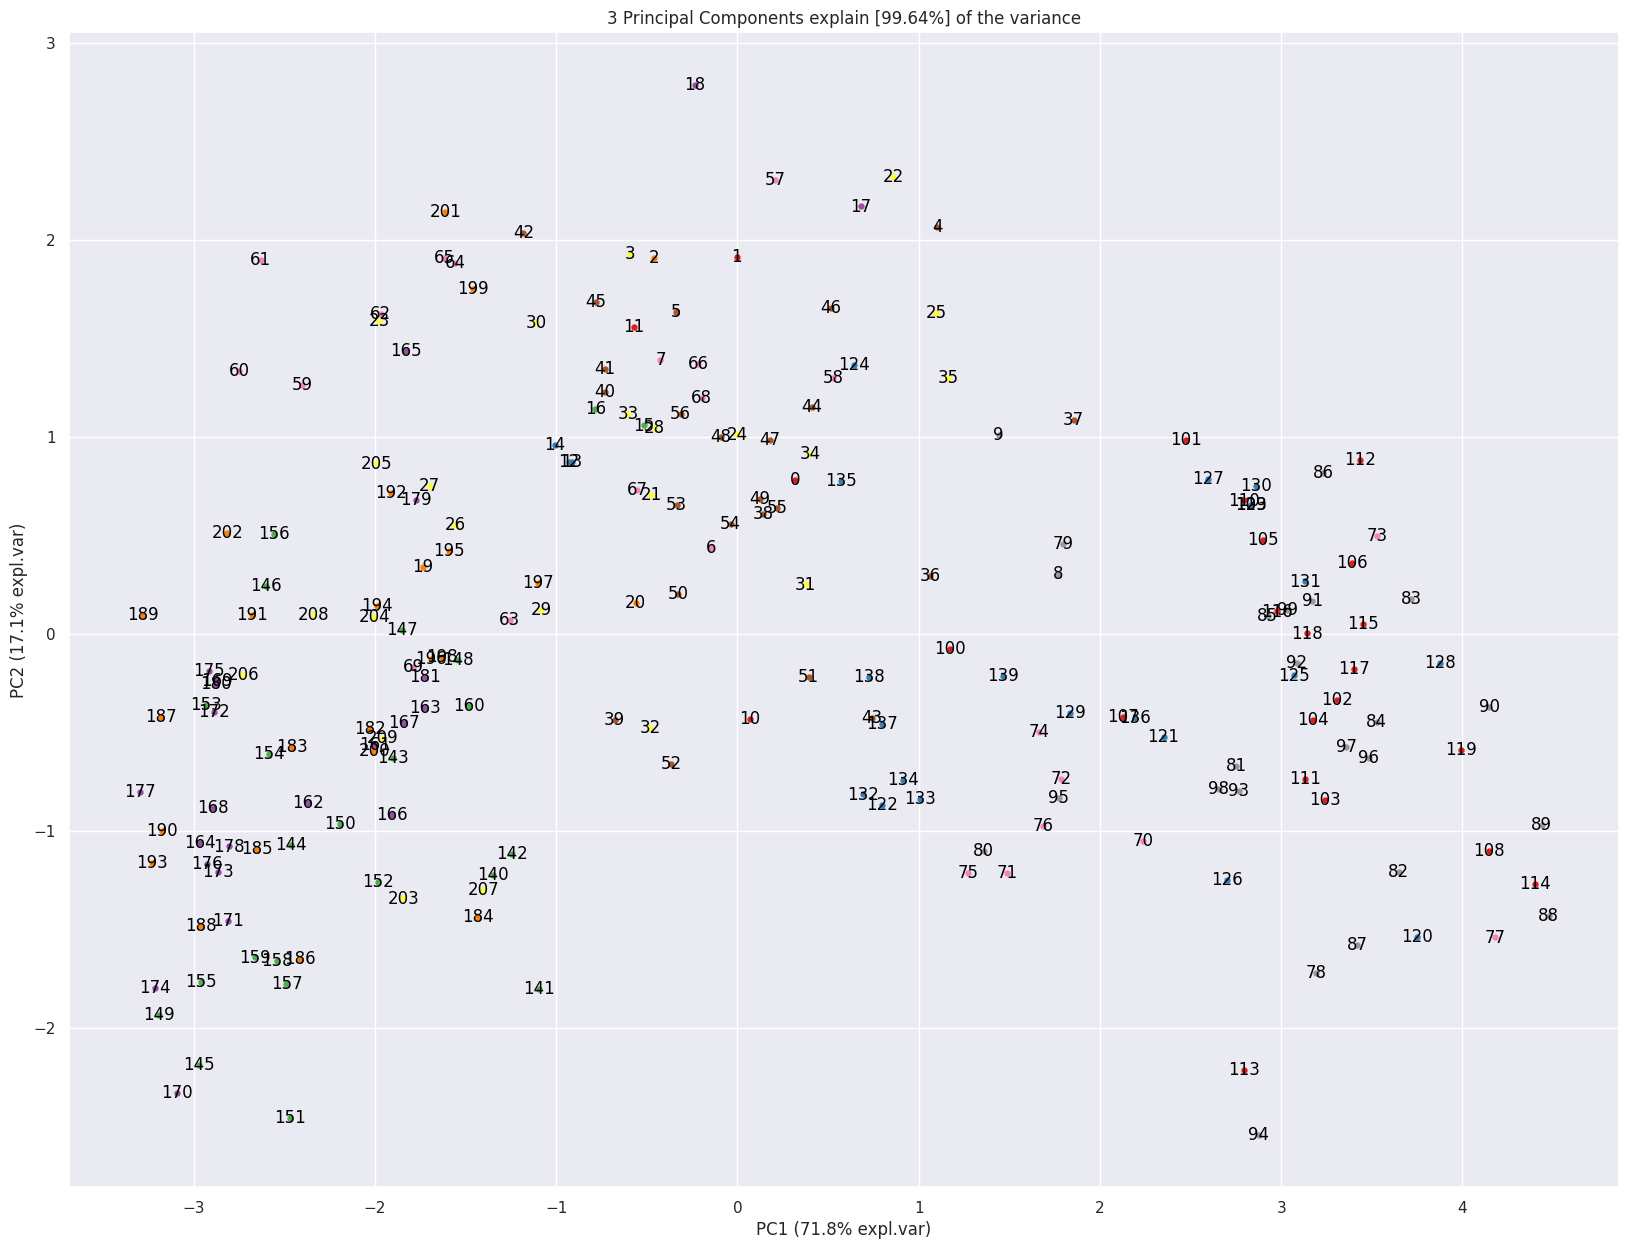

In [33]:
model.scatter(label=True, legend=False)

In [34]:
A = out['loadings'].T

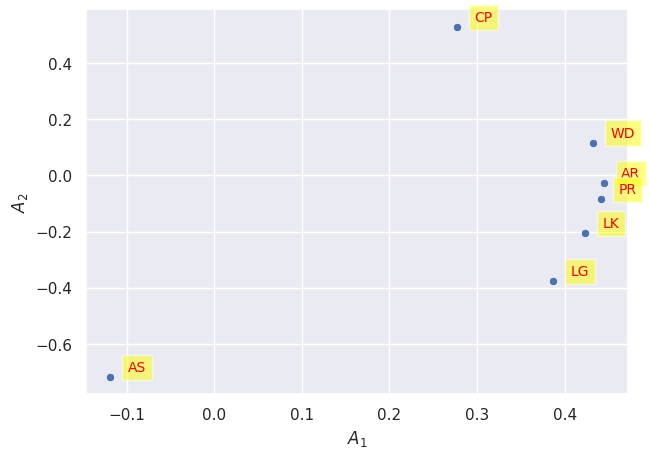

In [35]:
sns.scatterplot(data=A, x="PC1", y="PC2")
plt.xlabel('$A_1$')
plt.ylabel('$A_2$')
for i in range(A.shape[0]):
 plt.text(x=A.PC1[i]+0.02,y=A.PC2[i]+0.02, s=variables[i],
          fontdict=dict(color='red',size=10),
          bbox=dict(facecolor='yellow',alpha=0.5))

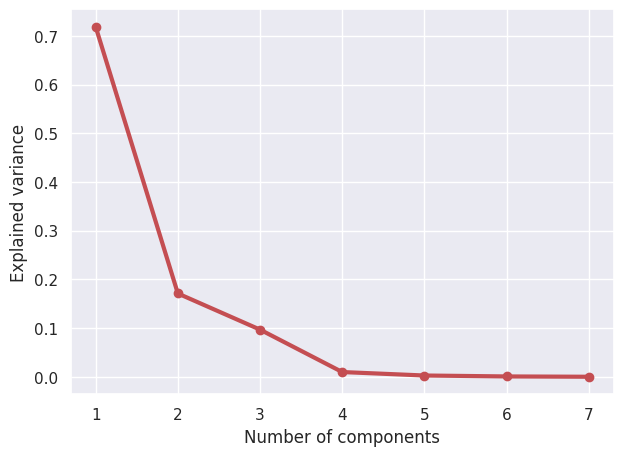

In [36]:
VR = out['variance_ratio']
x = np.arange(len(VR)) + 1
plt.plot(x, VR, 'ro-', lw=3)
plt.xticks(x, [""+str(i) for i in x], rotation=0)
plt.xlabel('Number of components')
plt.ylabel('Explained variance') 
plt.show()

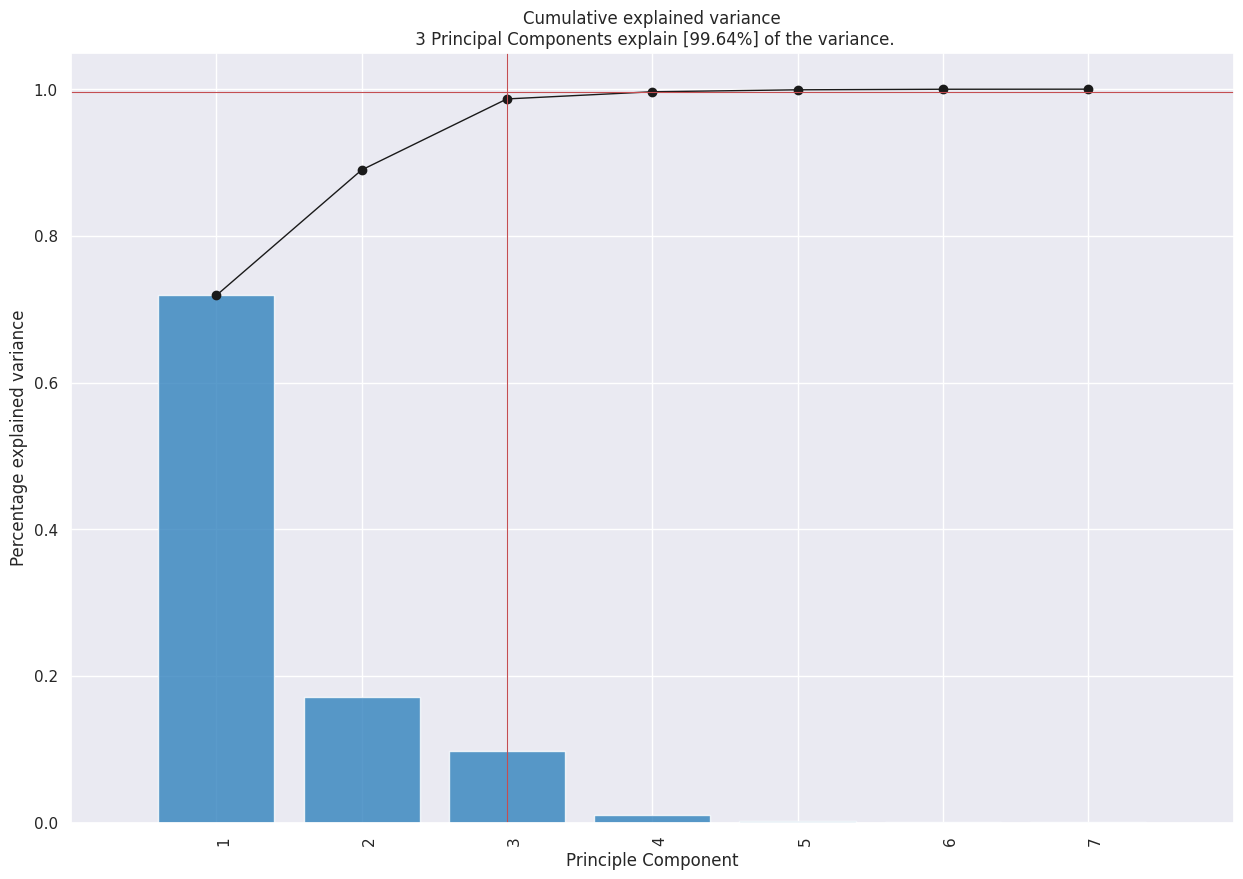

<Figure size 700x500 with 0 Axes>

In [37]:
model.plot();

[pca] >Plot PC1 vs PC2 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [210] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [210] unique colors! Available unique colors: [9].


(<Figure size 1500x1000 with 1 Axes>,
 <Axes: title={'center': '3 Principal Components explain [99.64%] of the variance'}, xlabel='PC1 (71.8% expl.var)', ylabel='PC2 (17.1% expl.var)'>)

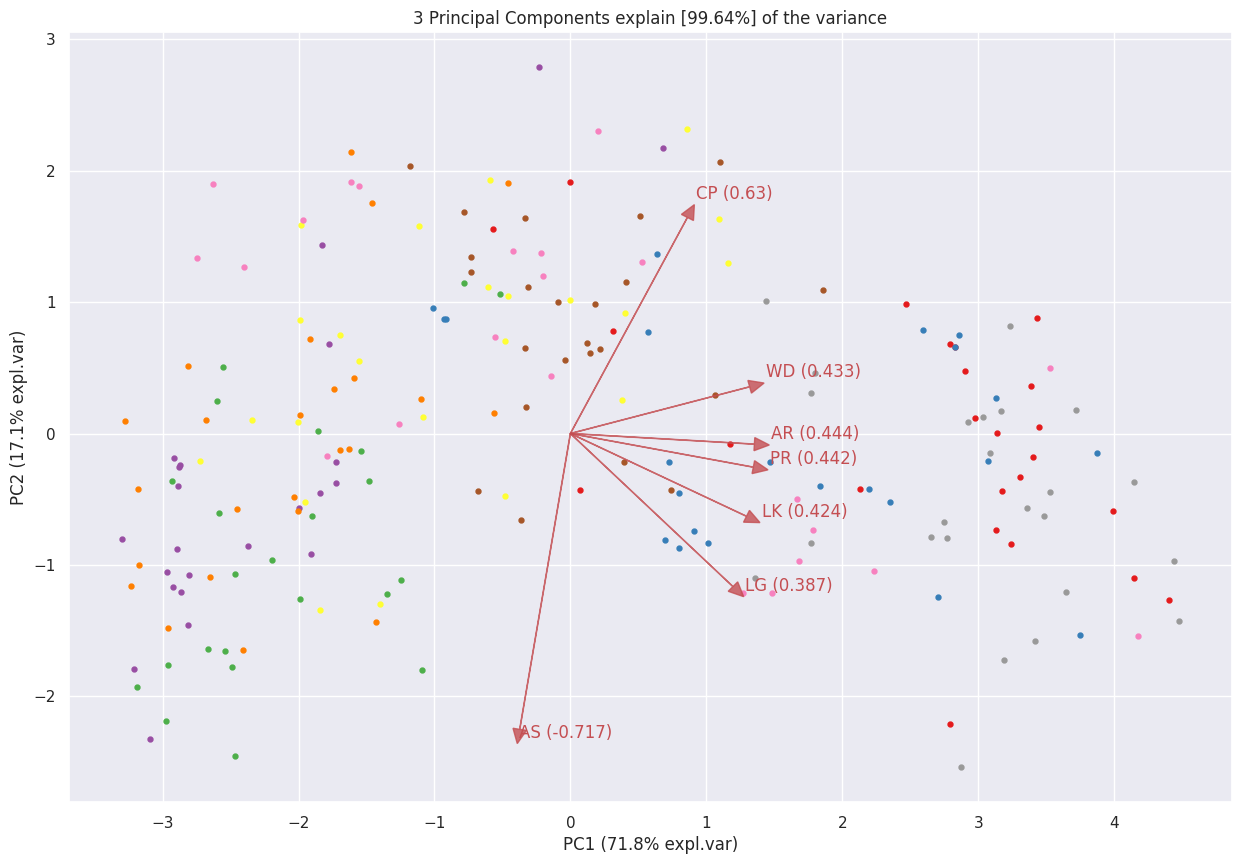

In [38]:
model.biplot(label=False, legend=False)

[pca] >Plot PC1 vs PC2 vs PC3 with loadings.
[colourmap]> Warning: Colormap [Set1] can not create [210] unique colors! Available unique colors: [9].
[colourmap]> Warning: Colormap [Set1] can not create [210] unique colors! Available unique colors: [9].


(<Figure size 1500x1000 with 1 Axes>,
 <Axes3D: title={'center': '3 Principal Components explain [99.64%] of the variance'}, xlabel='PC1 (71.8% expl.var)', ylabel='PC2 (17.1% expl.var)', zlabel='PC3 (9.68% expl.var)'>)

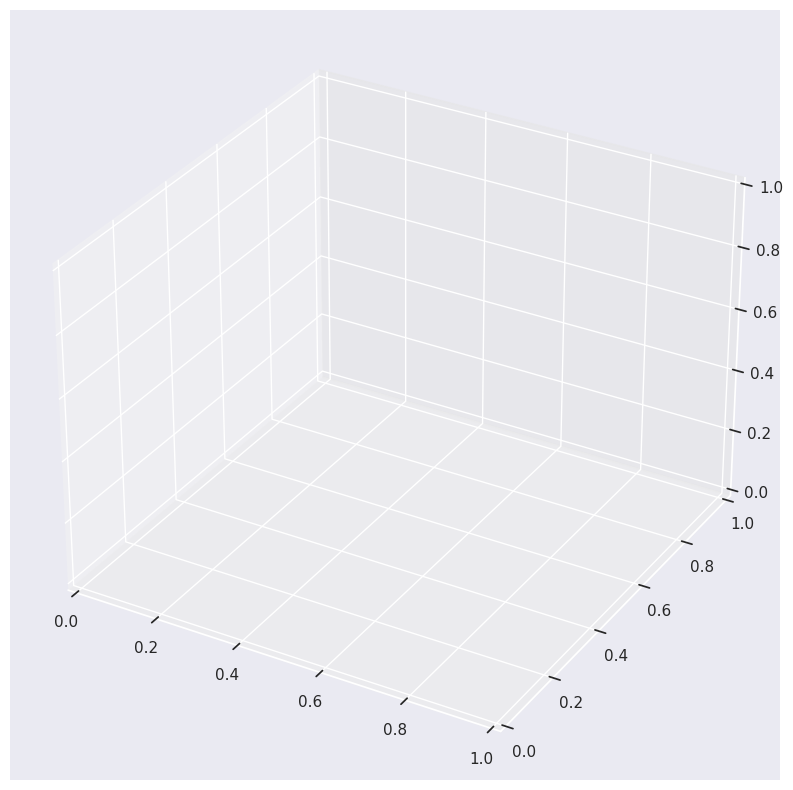

In [39]:
model.biplot3d(legend=False)

In [40]:
#For Google Colab only
from pycaret.utils import enable_colab 
enable_colab()

Colab mode enabled.


In [41]:
data = df.sample(frac=0.9, random_state=786)
data_unseen = df.drop(data.index)

data.reset_index(drop=True, inplace=True)
data_unseen.reset_index(drop=True, inplace=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (189, 8)
Unseen Data For Predictions: (21, 8)


In [ ]:
from pycaret.classification import *
clf = setup(data=data, target='class', train_size=0.7, session_id=123)

INFO:logs:PyCaret Supervised Module
INFO:logs:ML Usecase: classification
INFO:logs:version 2.3.6
INFO:logs:Initializing setup()
INFO:logs:setup(target=class, ml_usecase=classification, available_plots={'parameter': 'Hyperparameters', 'auc': 'AUC', 'confusion_matrix': 'Confusion Matrix', 'threshold': 'Threshold', 'pr': 'Precision Recall', 'error': 'Prediction Error', 'class_report': 'Class Report', 'rfe': 'Feature Selection', 'learning': 'Learning Curve', 'manifold': 'Manifold Learning', 'calibration': 'Calibration Curve', 'vc': 'Validation Curve', 'dimension': 'Dimensions', 'feature': 'Feature Importance', 'feature_all': 'Feature Importance (All)', 'boundary': 'Decision Boundary', 'lift': 'Lift Chart', 'gain': 'Gain Chart', 'tree': 'Decision Tree', 'ks': 'KS Statistic Plot'}, train_size=0.7, test_data=None, preprocess=True, imputation_type=simple, iterative_imputation_iters=5, categorical_features=None, categorical_imputation=constant, categorical_iterative_imputer=lightgbm, ordinal_fe

IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:45:39
Status,. . . . . . . . . . . . . . . . . .,Preprocessing Data


INFO:logs:Importing libraries
INFO:logs:Copying data for preprocessing
INFO:logs:Declaring preprocessing parameters
INFO:logs:Creating preprocessing pipeline
INFO:logs:Preprocessing pipeline created successfully
ERROR:logs:(Process Exit): setup has been interupted with user command 'quit'. setup must rerun.
INFO:logs:Creating global containers
INFO:logs:Internal pipeline: Pipeline(memory=None, steps=[('empty_step', 'passthrough')], verbose=False)


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
AR,Numeric
PR,Numeric
CP,Numeric
LK,Numeric
WD,Numeric
AS,Numeric
LG,Numeric
class,Label
